## Импорт

In [1]:
import pandas as pd


data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

## Разведочный анализ данных

### Общая информация, целевой признак.

In [6]:
data.sample(8)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
65,60.0,0,68,0,20,0,119000.0,2.9,127,1,1,64,1
245,61.0,1,80,1,38,0,282000.0,1.4,137,1,0,213,0
175,60.0,1,95,0,60,0,337000.0,1.0,138,1,1,146,0
86,55.0,0,47,0,35,1,173000.0,1.1,137,1,0,79,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
250,50.0,0,2522,0,30,1,404000.0,0.5,139,0,0,214,0
63,45.0,0,582,0,35,0,385000.0,1.0,145,1,0,61,1
207,85.0,0,212,0,38,0,186000.0,0.9,136,1,0,187,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Признаки в основном целочисленные, три с плавающей запятой, но к ним надо присмотреться, потому что два из них можно попробовать перевести в целочисленные.

'age' - возраст пациента (0-120, старше и младше не бывает)
'anaemia' - снижение показателей красных кровяных телец или гемоглобина (бинарный)
'creatinine_phosphokinase' - уровень фермента КФК в крови (мкг/л)
'diabetes' - наличие диабета (бинарный)
'ejection_fraction' - процент крови, покидающей сердце при каждом сокращении (в процентах, диапазон значений от 0 до 100)
'high_blood_pressure' - наличие гипертонии (бинарный)
'platelets' - тромбоциты в крови (1000/мл)
'serum_creatinine' - уровень сывороточного креатинина в крови (мг/дл)
'serum_sodium' - уровень сывороточного натрия в крови (мэкв/л)
'sex' - Женщина или мужчина (бинарный)
'smoking' - Курит пациент или нет (бинарный)
'time' - период наблюдения (дни) 
'DEATH_EVENT' - целевой признак, пациент умер в течение периода наблюдения (бинарный)

Все признаки должны быть неотрицательными.
Взглянем на них.

In [9]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Да, все неотрицательные, в допустимых диапазонах (для тех значений, которые мы обозначили ранее).


In [14]:
data.duplicated().sum()

0

Дублей не наблюдается.
Построим матрицу корреляций.

<AxesSubplot:>

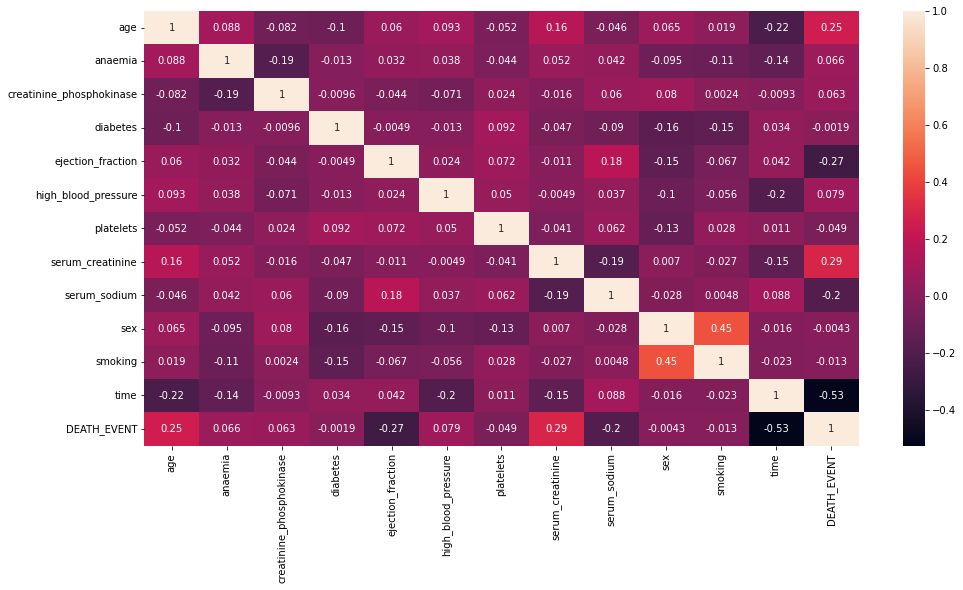

In [12]:
correlation_matrix = data.corr()

plt.figure(figsize= (16, 8))
sns.heatmap(correlation_matrix, annot = True)

Видим, что положительная корреляция есть между полом и курением, а также между временем наблюдения и целевым признаком. Также наблюдаем несколько ощутимую связь между целевым признаком и возрастом, уровнем креатинина и натрия (разнонаправленные) и размером выброса крови при сокращении сердца. 